![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification

In [97]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [52]:
# Celda 1.1
bikes.groupby('season').total.mean()

bikes['season'].describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

**Inferencias**: A partir de hacer el metodo describe de la variable de temporadas, podemos ver que el valor minimo que toma la variable es 1 y el maximo es 4. De la misma forma, vemos que el 25% de los datos se encuentran distribuidos en las primeras dos temporadas, el 50% entre las primeras 3 y el 45% entre la cuarta temporada. Asi mismo, vemos que la media de las temporadas es 2.5 y se tienen 10086 observaciones.

In [53]:
# Celda 1.2
bikes.groupby('hour').total.mean()

bikes['hour'].describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

**Inferencias**: A partir de hacer el metodo describe de la variable de temporadas, podemos ver que el valor minimo que toma la variable es de 0, lo que quiere decir que hay viajes a la media noche. Tambien, que su valor maximo son 23, lo que nos da una muestra de que hay usuarios que han usado las bicicletas a las 23 horas. De igual forma, vemos que el promedio del uso de las bicicletas son a las 11.5 horas y la desviacion estandar esta de 6.9. Con respecto a la distribucion, el 25% se encuentra entre las seis primeras horas, el 50% entre 12 horas y el 75% las 18 horas.y se tienen 10086 observaciones.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

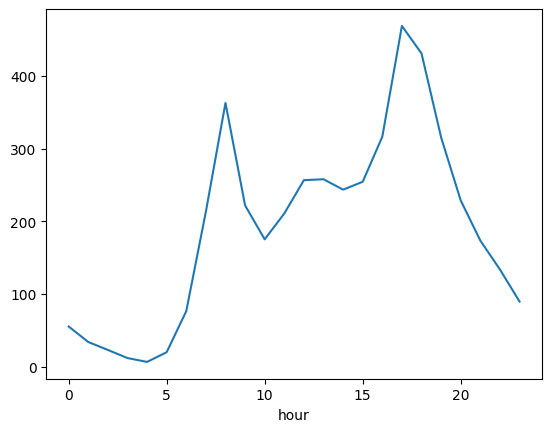

In [54]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

**Analisis de rentas promedio para cada valor de la variable "hour"**: Cuando se observa el comportamiento de las rentas promedio para cada valor de la variable de horas, podemos ver que el pico de las rentas es entre las 15 y 20 horas con un valor superior de 400 bicicletas. Ahora vemos que a las 5 horas, hay un numero menor a 100 bicicletas cuyo valor promedio de renta es menor. Tambien, podemos ver que a partir de las 5am hay un aumento en la renta llegando hasta las aproximadamente 400 bicicletas y hay una caida de la renta despues de las 8am. 

<Axes: xlabel='hour'>

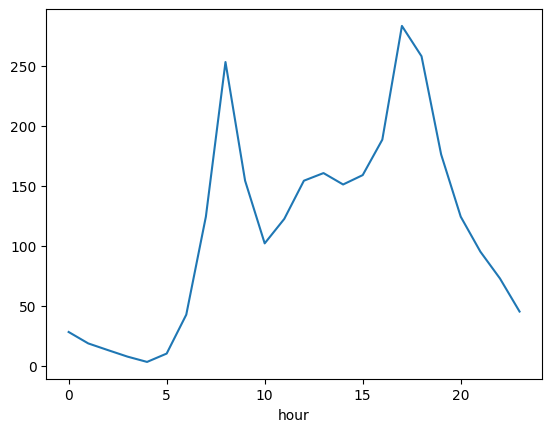

In [55]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_filter1 = bikes[bikes['season'] == 1]

bikes_filter1.groupby('hour').total.mean().plot()

**Analisis de rentas promedio para cada valor de la variable "hour" para la primera temporada**: Como en el punto anterior, podemos ver que hay un crecimiento de la renta a partir de la 5am, se alcanzan hasta los 250 usuarios. Sin embargo, tambien se ve una caida hasta las 100 bicicletas cuando se aproxima a las 10 am. No obstante, hay un crecimiento posterior del comportamiento de la renta despues de las 3pm alcanzando un numero superior a 250 y una caida despues de las 20 horas. 

<Axes: xlabel='hour'>

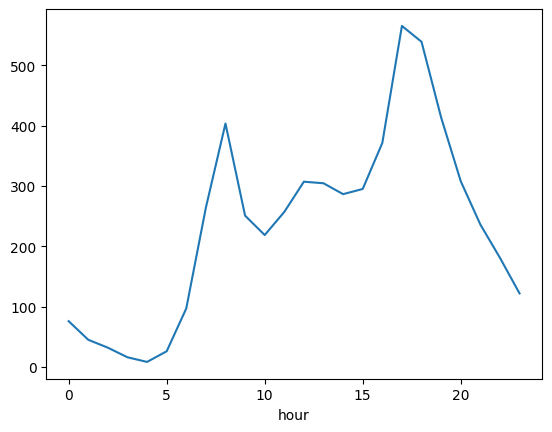

In [56]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_filter2 = bikes[bikes['season'] == 3]

bikes_filter2.groupby('hour').total.mean().plot()

**Analisis de rentas promedio para cada valor de la variable "hour" para la tercera temporada**: Vemos que en la tercera temporada hay un incremento del numero de bicicletas que hay. Por ejemplo, en la horas entre 15 y 20 hay un numero superior de 500 bicicletas y un incremento de la renta. De igual forma, vemos que a partir de la primera hora, se empeiza para la tercera temporada con un un numero menor a 100 bicicletas, que incrementa en la quinta hora hasta mas de 400 bicicletas registradas. Lo que se puede decir que en la tercera temporada del ano hay un numero mayor de usuario que en la primera temporada. 

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [100]:
# Celda 3

# A. Ajustar la variable categorica a variables dicotomicas
season_dummies = pd.get_dummies(bikes['season'], prefix='season')

# B. Ajusto los valores de la regresion
X = pd.concat([bikes['hour'], season_dummies], axis=1)

y = bikes['total']

model = LinearRegression().fit(X, y)

print('Intercepto:', model.intercept_)
print('Coeficientes:', model.coef_)

Intercepto: 69.53671247143546
Coeficientes: [ 10.54520609 -75.96697493  24.35025698  43.50057501   8.11614294]


**Analisis y limitaciones:** Como es posible ver, la regresion lineal en este tipo de situaciones es una desventaja ya que no logra capturar relaciones no lineales entre variables, lo que puede llevar a una subestimacion. Por otra parte, los valores atipicos pueden influir significativamente en los resultados de la regresion lineal, lo que puede llevar a una mala interpretacion. Por parte de los coeficientes, nos muestra que ninguno es menor a 0,05, lo que no permite concluir sobre este modelo.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [110]:
# Celda 4

# Selección de variables predictoras
bikes['season'] = bikes['season'].astype(int)
X = bikes.loc[:,['season','hour']]
y = (bikes.total > bikes['total'].median()).astype(int)


# Gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Creo una funcion que define gini_impurity
def gini_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    return gini_impurity_

# escojo el mejor split
def best_split(X, y, num_pct=10):
    features = range(X.shape[1])
    best_split = [0, 0, 0]  
    
    for j in features:
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:] 
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)                     
            if gain > best_split[2]:
                best_split = [j, split, gain]
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    j, split, gain = best_split(X, y, num_pct)

    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)

    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    return tree


# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 0.06425451863089747},
 'sr': {'y_pred': 1,
  'y_prob': 0.6987935289278859,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 0.05853892375774267}}

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

(0.025261134067952253, 4)

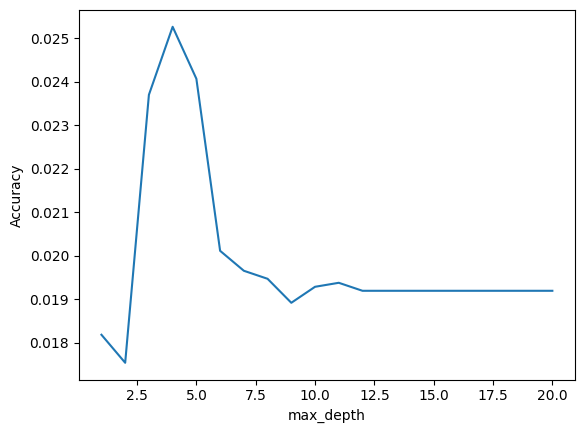

In [102]:
# Celda 5


# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

In [72]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

**Analisis del Modelo**: cuando max_depth alcanza un 2.5 vemos que el accuracy del modelo llega hasta 0.63 y luego tiene una caida despues de que max_depth llega a 5.0. En comparacion de este modelo, es posible ver el modelo logra clasificar con un 63% predecir correctamente de los casos en el conjunto de datos de prueba. 

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [62]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [63]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [64]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [86]:
# Celda 6
# Establezco datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier con un max_depth=6 para calibrar al menos un parametro
dtc = DecisionTreeClassifier(max_depth=6)
dtc.fit(X_train, y_train)

# LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluo desempeno con las metricas solicitadas
models = [dtc, lr]
for model in models:
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    print("Modelo:", model)
    print("Accuracy (entrenamiento):", train_acc, "- Accuracy (prueba):", test_acc)
    print("F1-Score (entrenamiento):", train_f1, "- F1-Score (prueba):", test_f1)

Modelo: DecisionTreeClassifier(max_depth=5)
Accuracy (entrenamiento): 0.6691666666666667 - Accuracy (prueba): 0.6483333333333333
F1-Score (entrenamiento): 0.6773669240146282 - F1-Score (prueba): 0.6574675324675324
Modelo: LogisticRegression()
Accuracy (entrenamiento): 0.6160416666666667 - Accuracy (prueba): 0.6241666666666666
F1-Score (entrenamiento): 0.6091198303287381 - F1-Score (prueba): 0.6108714408973253


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [87]:
# Escenario 1
dtc1 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, random_state=0)
dtc1.fit(X, y)

# Escenario 2
dtc2 = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5), n_estimators=300, random_state=0)
dtc2.fit(X, y)

# Escenario 3
lr = BaggingClassifier(LogisticRegression(), n_estimators=300, random_state=0)
lr.fit(X, y)

# Ensamble de votación mayoritaria con los tres modelos
ensemble = VotingClassifier(estimators=[('dtc1', dtc1), ('dtc2', dtc2), ('lr', lr)], voting='hard')
ensemble.fit(X, y)

# Accuracy y F1-Score
models = [dtc1, dtc2, lr]
for model in models:
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print("Modelo:", model, "- Accuracy:", acc, "- F1-Score:", f1)

y_pred = ensemble.predict(X)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print("Ensemble - Accuracy:", acc, "- F1-Score:", f1)

Modelo: BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=300, random_state=0) - Accuracy: 0.6933333333333334 - F1-Score: 0.694555112881806
Modelo: BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=5),
                  n_estimators=300, random_state=0) - Accuracy: 0.9823333333333333 - F1-Score: 0.9823097463284378
Modelo: BaggingClassifier(estimator=LogisticRegression(), n_estimators=300,
                  random_state=0) - Accuracy: 0.621 - F1-Score: 0.6174293405114402
Ensamble - Accuracy: 0.7653333333333333 - F1-Score: 0.7661129568106312


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [106]:
# Escenario 1
dtc1 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, random_state=0)
dtc1.fit(X, y)

# Escenario 2
dtc2 = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=5), n_estimators=300, random_state=0)
dtc2.fit(X, y)

# Escenario 3
lr = BaggingClassifier(LogisticRegression(), n_estimators=300, random_state=0)
lr.fit(X, y)

# Ensamble para votacion ponderada
weights = [0.4, 0.4, 0.2]  # Pesos para cada modelo en el ensamble
ensemble = VotingClassifier(estimators=[('dtc1', dtc1), ('dtc2', dtc2), ('lr', lr)], voting='soft', weights=weights)
ensemble.fit(X, y)

# Accuracy y F1-Score
models = [dtc1, dtc2, lr]
for model in models:
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print("Modelo:", model, "- Accuracy:", acc, "- F1-Score:", f1)

y_pred = ensemble.predict(X)
acc = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print("Ensamble - Accuracy:", acc, "- F1-Score:", f1)

Modelo: BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=300, random_state=0) - Accuracy: 0.944 - F1-Score: 0.9437751004016065
Modelo: BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=5),
                  n_estimators=300, random_state=0) - Accuracy: 0.978 - F1-Score: 0.9780439121756487
Modelo: BaggingClassifier(estimator=LogisticRegression(), n_estimators=300,
                  random_state=0) - Accuracy: 0.859 - F1-Score: 0.8588588588588588
Ensamble - Accuracy: 0.954 - F1-Score: 0.954183266932271


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Considerando en los puntos 7 y 8 tres modelos con las mismas caracteristicas que son las siguientes:

-100 árboles de decisión donde max_depth tome un valor de su elección
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección
-100 regresiones logísticas
    
**Para el escenario 1:**

*Por medio del metodo de votacion mayoritaria*
- Accuracy: 0.69 
- F1-Score: 0.69

*Por medio del metodo de votacion ponderada*
- Accuracy: 0.94 
- F1-Score: 0.94

**Para el escenario 2:**

*Por medio del metodo de votacion mayoritaria*
- Accuracy: 0.98
- F1-Score: 0.98

*Por medio del metodo de votacion ponderada*
- Accuracy: 0.97 
- F1-Score: 0.97

**Para el escenario 3:**

*Por medio del metodo de votacion mayoritaria*
- Accuracy: 0.62
- F1-Score: 0.61

*Por medio del metodo de votacion ponderada*
- Accuracy: 0.85
- F1-Score: 0.85

**Ensambles**:
- Modelo punto 7: Accuracy (0.76) y F1-Score (0.76)
- Modelo punto 8: Accuracy (0.95) y F1-Score (0.95)

Por medio de estos resultados es posible decir que la aproximacion por un modelo de ponderada es mejor que la votacion mayoritaria. Se puede ver que en los diferentes escenarios logra tener mayor precision y un puntaje F1 superior. Asi mismo, lo anterior es comprobado por medio Accuracy y F1-Score. 